<a href="https://colab.research.google.com/github/SohamGaonkar/Hackrush/blob/main/HackRush.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

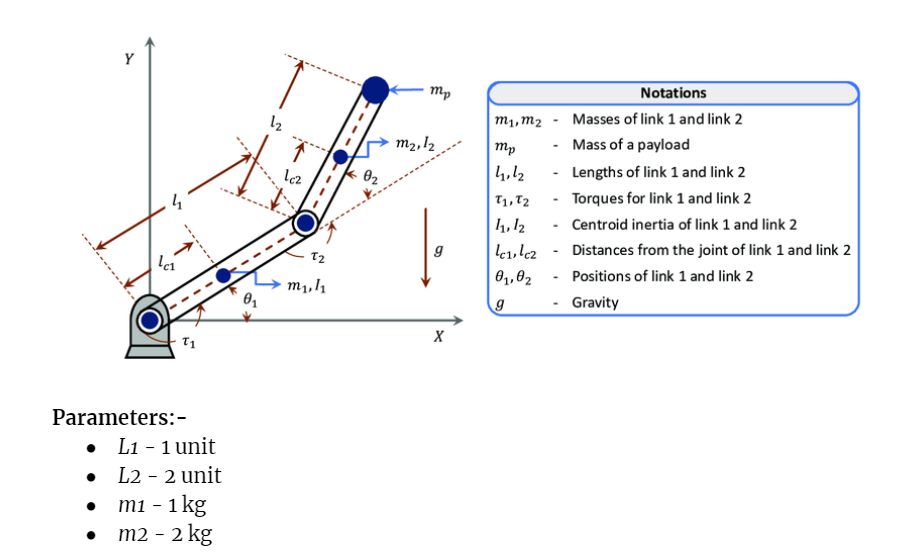

In [4]:
L1=1
L2 =2
m1=1
m2=2

# Level 1: Navigating the Cartesian Plane [10 Points]

In [6]:
def inverse_kinematics(x_target,y_target):
  global L1,L2
  theta2 = np.arccos((x_target**2 + y_target**2 - L1**2 - L2**2)/(2*L1*L2))
  theta1 = np.arctan2(y_target, x_target) - np.arctan2(L2 * np.sin(theta2), L1 + L2 * np.cos(theta2))
  return theta1, theta2

destination_x = -1.75
destination_y = 2.0
theta1, theta2 = inverse_kinematics(destination_x, destination_y)
print("Joint angle theta1:", np.degrees(theta1))
print("Joint angle theta2:", np.degrees(theta2))

innercoords = [L1*np.cos(theta1),L1*np.sin(theta1)]
print("Inner Coordinates:",innercoords)

Joint angle theta1: 91.03385476113975
Joint angle theta2: 58.96075998960212
Inner Coordinates: [-0.018043190412205316, 0.9998372083893202]


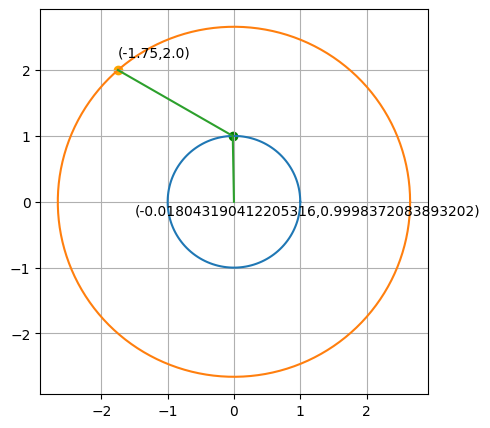

In [12]:
theta = np.linspace( 0 , 2 * np.pi , 150 )

a = L1* np.cos( theta )
b = L1* np.sin( theta )
a1 = np.sqrt((1.75)**2 +(2)**2)* np.cos( theta )
b1 = np.sqrt((1.75)**2 +(2)**2) * np.sin( theta )
plt.figure(figsize=(5,5))

plt.plot(a,b)
plt.plot(a1,b1)


plt.plot([0,innercoords[0],destination_x],[0,innercoords[1],destination_y])

plt.scatter([innercoords[0]],[innercoords[1]],color='g')
plt.scatter([destination_x],[destination_y],color='orange')
plt.grid()

plt.text(-1.5,-0.2, f'({innercoords[0]},{innercoords[1]})', fontsize = 10)
plt.text(-1.75,2.2, f'({destination_x},{destination_y})', fontsize = 10)
plt.show()

# Level 2: Following the Smooth Trajectory [20 Points]

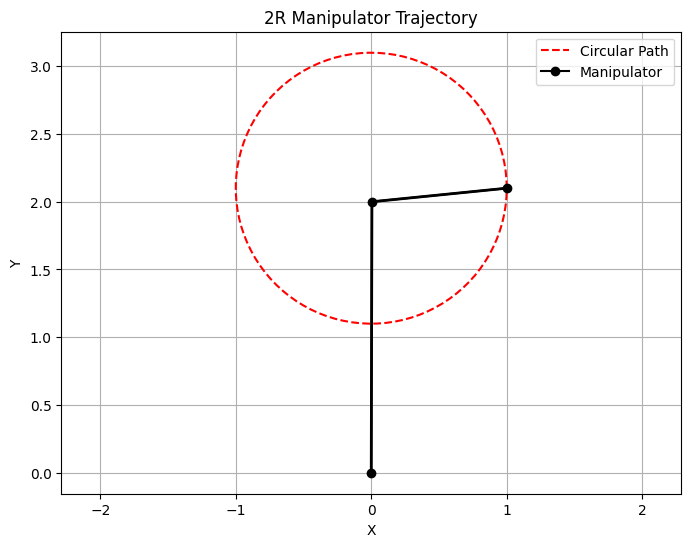

In [2]:
# Function to update the plot for animation
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

center = (0, 2.1)  # Center of the circular path
radius = 1  # Radius of the circular path


num_points = 100  # Number of points on the trajectory
theta = np.linspace(0, 2*np.pi, num_points)  # Angles from 0 to 2*pi
x_traj = center[0] + radius * np.cos(theta)
y_traj = center[1] + radius * np.sin(theta)
trajectory_data = np.zeros((num_points, 3))  # Each row: [x_end_effector, y_end_effector, time]


def update(frame):
    plt.cla()
    plt.plot(x_traj, y_traj, 'r--', label='Circular Path')
    x_target = x_traj[frame]
    y_target = y_traj[frame]

    #  distance from the origin to the target point
    dist_to_target = np.sqrt(x_target**2 + y_target**2)
    y_c = 0

    theta2_c =0
    D = (x_target**2 + y_target**2 - L1**2 - L2**2) / (2 * L1 * L2)

    if y_target>=2.9:
      y_target = 2.9


    # positions of the joints
    D = (x_target**2 + y_target**2 - L1**2 - L2**2) / (2 * L1 * L2)
    theta2 = np.arctan2(-np.sqrt(1 - D**2), D)
    theta1 = np.arctan2(y_target, x_target) - np.arctan2(L2 * np.sin(theta2), L1 + L2 * np.cos(theta2))

    x_end_effector = L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2)
    y_end_effector = L1 * np.sin(theta1) + L2 * np.sin(theta1 + theta2)
    x_joints = [0, L1 * np.cos(theta1), x_end_effector]
    y_joints = [0, L1 * np.sin(theta1), y_end_effector]
    y_c = y_end_effector

    theta2_c = theta2


    # Plot
    plt.plot(x_joints, y_joints, 'ko-')
    plt.plot([0, x_joints[1]], [0, y_joints[1]], 'k-', linewidth=2)  # First link
    plt.plot([x_joints[1], x_joints[2]], [y_joints[1], y_joints[2]], 'k-', linewidth=2)  # Second link
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('2R Manipulator Trajectory')
    plt.axis('equal')
    plt.legend(['Circular Path', 'Manipulator'])
    plt.grid(True)

    trajectory_data[frame, :] = [x_end_effector, y_end_effector, frame]



# animation
fig = plt.figure(figsize=(8, 6))
ani = FuncAnimation(fig, update, frames=num_points, interval=50, repeat=False)

# Save the animation as a video file
writer = FFMpegWriter(fps=15)
ani.save('2_trajectory.mp4', writer=writer)
# Save trajectory data to CSV
np.savetxt('2_trajectory_data.csv', trajectory_data, delimiter=',')

plt.show()


# Level 3:Dynamic Trajectory Manoeuvring

In [11]:
# import numpy as np
# import sympy as sp

# # Function to compute the Jacobian matrix
# def compute_jacobian(theta1, theta2, l1, l2):
#     # Define the Jacobian matrix using the symbolic variables
#     J = np.array([[-l1*np.sin(theta1)-l2*np.sin(theta1+theta2), -l2*np.sin(theta1+theta2)],
#                   [l1*np.cos(theta1)+l2*np.cos(theta1+theta2), l2*np.cos(theta1+theta2)]])
#     return J


# # Define symbolic variables
# theta1, theta2, theta_dot1, theta_dot2 = sp.symbols('theta1 theta2 theta_dot1 theta_dot2')
# l1, l2 = sp.symbols('l1 l2')

# def h(theta1, theta2, theta_dot1, theta_dot2):
#     # Define symbolic functions for sin and cos
#     sin1 = sp.sin(theta1)
#     sin2 = sp.sin(theta2)
#     cos1 = sp.cos(theta1)
#     cos2 = sp.cos(theta2)

#     # Express the velocity of each link
#     v_x1 = -l1*sin1*theta_dot1
#     v_y1 = l1*cos1*theta_dot1
#     v_x2 = v_x1 - l2*(sin1*theta_dot1 + sin2*(theta_dot1 + theta_dot2))
#     v_y2 = v_y1 + l2*(cos1*theta_dot1 + cos2*(theta_dot1 + theta_dot2))

#     # Compute the third component of the cross product of velocity and acceleration
#     h = (v_x1 * sp.diff(v_x2, theta_dot1) + v_y1 * sp.diff(v_y2, theta_dot1) +
#          v_x1 * sp.diff(v_x2, theta_dot2) + v_y1 * sp.diff(v_y2, theta_dot2))

#     # Simplify the expression
#     h = sp.simplify(h)

#     return h

# # Function to compute torque
# def compute_torque(theta1, theta2, theta_dot1, theta_dot2, theta_ddot1, theta_ddot2, l1, l2, m1, m2, g, h):
#     # Joint space inertia matrix (assuming point masses)
#     M = np.array([[m1*(l1**2) + m2*(l2**2 + 2*l1*l2*np.cos(theta2)) + 2*m2*l1*l2*np.cos(theta2), m2*(l2**2 + l1*l2*np.cos(theta2))],
#                   [m2*(l2**2 + l1*l2*np.cos(theta2)), m2*(l2**2)]])

#     # Coriolis matrix
#     C = np.array([[-h*l2*np.sin(theta2)*theta_dot2, -h*l2*np.sin(theta2)*(theta_dot1 + theta_dot2)],
#                   [h*l2*np.sin(theta2)*theta_dot1, 0]])

#     # Gravity vector
#     G = np.array([(m1*l1 + m2*l1)*g*np.sin(theta1) + m2*l2*g*np.sin(theta1+theta2),
#                   m2*l2*g*np.sin(theta1+theta2)])

#     # Joint space acceleration vector
#     q_ddot = np.array([theta_ddot1, theta_ddot2])

#     # Compute Jacobian matrix
#     J = compute_jacobian(theta1, theta2, l1, l2)

#     # Compute torque
#     tau = np.dot(J.T, np.dot(M, q_ddot) + np.dot(C, np.array([theta_dot1, theta_dot2])) + G)

#     return M,C,G,q_ddot,J,tau

# # Example usage
# theta1_val = np.pi/4  # Joint angle 1
# theta2_val = np.pi/3  # Joint angle 2
# theta_dot1_val = 0.1  # Joint velocity 1
# theta_dot2_val = 0.05  # Joint velocity 2
# theta_ddot1_val = 0.01  # Joint acceleration 1
# theta_ddot2_val = 0.02  # Joint acceleration 2
# l1_val = 1.0
# l1=1
# l2=0.8  # Length of link 1
# l2_val = 0.8  # Length of link 2
# m1_val = 1.0  # Mass of link 1
# m2_val = 0.8  # Mass of link 2
# g_val = 9.81  # Acceleration due to gravity

# # Compute the value of h using the symbolic expression
# theta1, theta2, theta_dot1, theta_dot2 = sp.symbols('theta1 theta2 theta_dot1 theta_dot2')
# h_expr = h(theta1, theta2, theta_dot1, theta_dot2)
# h_value = h_expr.evalf(subs={theta1: theta1_val, theta2: theta2_val, theta_dot1: theta_dot1_val, theta_dot2: theta_dot2_val})

# # Compute torque
# M,C,G,q_dpt,J,tau = compute_torque(theta1_val, theta2_val, theta_dot1_val, theta_dot2_val, theta_ddot1_val, theta_ddot2_val, l1_val, l2_val, m1_val, m2_val, g_val, h_value)
# print("Torque:", tau)


Torque: [-24.4706666869276 -15.6269695355991]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
from scipy.integrate import solve_ivp

# Define parameters
L1 = 1.0  # Length of link 1
L2 = 0.8  # Length of link 2
m1 = 1.0  # Mass of link 1
m2 = 0.8  # Mass of link 2
g = 9.81  # Acceleration due to gravity

# Initial conditions
initial_q1 = 0
initial_q2 = 0
initial_dq1 = 0
initial_dq2 = 0

# Total time for simulation
total_time = 4

# Torque input
torque_input = np.array([1, 1])

# Define the dynamic equations of motion
def dynamic_equations(t, y, torque_input):
    q1, q2, dq1, dq2 = y

    # Compute inertia matrix M(q)
    M = np.array([[m1*(L1**2) + m2*(L2**2 + 2*L1*L2*np.cos(q2)) + 2*m2*L1*L2*np.cos(q2), m2*(L2**2 + L1*L2*np.cos(q2))],
                  [m2*(L2**2 + L1*L2*np.cos(q2)), m2*(L2**2)]])

    # Coriolis matrix
    C = np.array([[-m2*L1*L2*np.sin(q2)*dq2, -m2*L1*L2*np.sin(q2)*(dq1 + dq2)],
                  [m2*L1*L2*np.sin(q2)*dq1, 0]])

    # Gravity vector
    G = np.array([(m1*L1 + m2*L1)*g*np.sin(q1) + m2*L2*g*np.sin(q1+q2),
                  m2*L2*g*np.sin(q1+q2)])

    # Compute the desired end-effector position (circular trajectory)
    x_desired = np.sin(2 * t)
    y_desired = np.cos(2 * t)

    # Compute the Jacobian matrix
    J = np.array([[-L1*np.sin(q1) - L2*np.sin(q1 + q2), -L2*np.sin(q1 + q2)],
                  [L1*np.cos(q1) + L2*np.cos(q1 + q2), L2*np.cos(q1 + q2)]])

    # Compute the desired end-effector velocity using the time derivative of the desired position
    dx_desired = 2 * np.cos(2 * t)
    dy_desired = -2 * np.sin(2 * t)
    v_desired = np.array([dx_desired, dy_desired])

    # Compute the joint velocities
    try:
        dq = np.linalg.solve(J, v_desired)
    except np.linalg.LinAlgError:
        # Handle singularity by setting joint velocities to zero
        dq = np.array([0, 0])

    # Compute torque
    tau = np.dot(M, dq) + np.dot(C, np.array([dq1, dq2])) + G - torque_input

    # Compute joint accelerations ddq = M(q)^-1 * (tau - C(q, dq)*dq - G(q))
    ddq = np.linalg.solve(M, tau - np.dot(C, np.array([dq1, dq2])) - G)

    return [dq1, dq2, ddq[0], ddq[1]]

# Define initial conditions
y0 = [initial_q1, initial_q2, initial_dq1, initial_dq2]

# Define time span
t_span = (0, total_time)

# Solve the dynamic equations numerically
solution = solve_ivp(dynamic_equations, t_span, y0, args=(torque_input,), t_eval=np.linspace(0, total_time, 100))

# Extract joint angles from the solution
q1 = solution.y[0]
q2 = solution.y[1]

# Calculate end-effector positions
x_end = L1 * np.cos(q1) + L2 * np.cos(q1 + q2)
y_end = L1 * np.sin(q1) + L2 * np.sin(q1 + q2)

# Create animation
fig, ax = plt.subplots()
line, = ax.plot([], [], 'o-', lw=2)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')
ax.grid(True)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = [0, L1 * np.cos(q1[i]), x_end[i]]
    y = [0, L1 * np.sin(q1[i]), y_end[i]]
    line.set_data(x, y)
    return line,

ani = FuncAnimation(fig, animate, frames=len(solution.t), init_func=init, blit=True)

# Save the animation as a video file
writer = FFMpegWriter(fps=15)
ani.save('manipulator_trajectory_animation.mp4', writer=writer)

plt.show()


<ipython-input-4-359b660744e2>:65: RuntimeWarning: invalid value encountered in subtract
  ddq = np.linalg.solve(M, tau - np.dot(C, np.array([dq1, dq2])) - G)
